In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
#import pickle
import datetime 
#import os
import seaborn as sns
from sklearn.preprocessing import *

%matplotlib inline

In [71]:
pd.__version__

'0.20.3'

In [72]:
#print (os.listdir(os.getcwd()))

In [73]:
train = pd.read_csv("train_users_2.csv")
test = pd.read_csv("test_users.csv")

In [74]:
train.shape

(213451, 16)

In [75]:
test.shape

(62096, 15)

In [76]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [77]:
train.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [78]:
print ('training dataset ({} rows) null value:\n'.format(train.shape[0]))
print (train.isnull().sum(axis = 0))
print ('\n' + '***' * 10 + '\n')
print ('test dataset ({} rows) null value:\n'.format(test.shape[0]))
print (test.isnull().sum(axis = 0))

training dataset (213451 rows) null value:

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

******************************

test dataset (62096 rows) null value:

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel             

In [79]:
train_row = train.shape[0]

# The label we need to predict
labels = train['country_destination'].values

# the id number is not useful for prediction. We need it for submission
id_test = test['id']

# drop the id column
# drop the date_first_booking since there is all Nan in test dataset which we figured out in the data exploration
# drop the label in training set
#train.drop(['country_destination', 'date_first_booking', 'id'], axis = 1, inplace = True)
#test.drop(['date_first_booking', 'id'], axis = 1, inplace = True)

In [80]:
labels

array(['NDF', 'NDF', 'US', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

In [81]:
#删除不考虑的列
train.drop(['country_destination', 'date_first_booking','id'], axis = 1, inplace = True)
test.drop(['date_first_booking','id'], axis = 1, inplace = True)

In [82]:
labels

array(['NDF', 'NDF', 'US', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

In [83]:
train.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [84]:
test.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2014-07-01,20140701000006,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,2014-07-01,20140701000051,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,2014-07-01,20140701000148,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,2014-07-01,20140701000215,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,2014-07-01,20140701000305,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


# Feature engineering 

In [85]:
# join the two dataset first. Need one hot encoding

# remember now we have few things that need to deal with:

# 1. date_account_created: create some new features
# 2. timestamp_first_active: convert it to datetime data type
# 3. age column
# one hot encoding the other features

In [86]:
#ignore_index：忽略index，重新生成index
df = pd.concat([train, test], axis = 0, ignore_index = True)
df.shape

(275547, 13)

In [87]:
df.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 13 columns):
date_account_created       275547 non-null object
timestamp_first_active     275547 non-null int64
gender                     275547 non-null object
age                        158681 non-null float64
signup_method              275547 non-null object
signup_flow                275547 non-null int64
language                   275547 non-null object
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
first_affiliate_tracked    269462 non-null object
signup_app                 275547 non-null object
first_device_type          275547 non-null object
first_browser              275547 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 27.3+ MB


In [89]:
df.head(10)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
5,2010-01-01,20100101215619,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
6,2010-01-02,20100102012558,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
7,2010-01-03,20100103191905,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari
8,2010-01-04,20100104004211,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
9,2010-01-04,20100104023758,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox


# timestamp_first_active

In [90]:
tfa = df.timestamp_first_active.astype(str).apply(lambda x: datetime.datetime(int(x[:4]),
                                                                          int(x[4:6]), 
                                                                          int(x[6:8]),
                                                                          int(x[8:10]),
                                                                          int(x[10:12]),
                                                                          int(x[12:])))

In [91]:
tfa

0        2009-03-19 04:32:55
1        2009-05-23 17:48:09
2        2009-06-09 23:12:47
3        2009-10-31 06:01:29
4        2009-12-08 06:11:05
5        2010-01-01 21:56:19
6        2010-01-02 01:25:58
7        2010-01-03 19:19:05
8        2010-01-04 00:42:11
9        2010-01-04 02:37:58
10       2010-01-04 19:42:51
11       2010-01-05 05:18:12
12       2010-01-05 06:08:59
13       2010-01-05 08:32:59
14       2010-01-07 05:58:20
15       2010-01-07 20:45:55
16       2010-01-07 21:51:25
17       2010-01-07 22:46:25
18       2010-01-08 01:56:41
19       2010-01-10 01:08:17
20       2010-01-10 15:21:20
21       2010-01-10 22:09:41
22       2010-01-11 03:14:38
23       2010-01-11 22:40:15
24       2010-01-11 23:08:08
25       2010-01-12 13:14:44
26       2010-01-12 15:54:20
27       2010-01-12 20:59:49
28       2010-01-13 04:46:50
29       2010-01-13 06:43:33
                 ...        
275517   2014-09-30 23:14:54
275518   2014-09-30 23:15:18
275519   2014-09-30 23:19:52
275520   2014-

In [92]:
# try to create some features:

# numerical: year, month, day; time difference between dac and tfa;
# categorical: which season; weekday or weekend?

In [93]:
df.head(2)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome


In [94]:
# create tfa_year, tfa_month, tfa_day feature

df['tfa_year'] = np.array([x.year for x in tfa])
df['tfa_month'] = np.array([x.month for x in tfa])
df['tfa_day'] = np.array([x.day for x in tfa])

In [95]:
df.head(5)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,tfa_year,tfa_month,tfa_day
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009,3,19
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2009,5,23
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2009,6,9
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2009,10,31
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2009,12,8


In [96]:
# create features of weekday
#ISO weekday:ISO星期
df['tfa_wd'] = np.array([x.isoweekday() for x in tfa])
df_tfa_wd = pd.get_dummies(df.tfa_wd, prefix = 'tfa_wd')
df = pd.concat((df, df_tfa_wd), axis = 1)
df.drop(['tfa_wd'], axis = 1, inplace = True)
df.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,2009,3,19,0,0,0,1,0,0,0
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,...,2009,5,23,0,0,0,0,0,1,0
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,2009,6,9,0,1,0,0,0,0,0
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,2009,10,31,0,0,0,0,0,1,0
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,2009,12,8,0,1,0,0,0,0,0


In [97]:
df_tfa_wd.head()

,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0


In [98]:
def get_season(dt):
    dt = dt.date()
    # dt must be a datetime type
    if dt.month in [3,4,5]:
        return 'Spring'    # spring
    elif dt.month in [6,7,8]:
        return 'Summer'    # summer
    elif dt.month in [9,10,11]:
        return 'Fall'    # fall
    else:
        return 'Winter'    # winter
    

In [99]:
df['tfa_season'] = np.array([get_season(x) for x in tfa])
df_tfa_season = pd.get_dummies(df.tfa_season, prefix = 'tfa_season')
df = pd.concat((df, df_tfa_season), axis = 1)
df.drop(['tfa_season'], axis = 1, inplace = True)
df.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,tfa_season_Fall,tfa_season_Spring,tfa_season_Summer,tfa_season_Winter
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,0,0,1,0,0,0,0,1,0,0
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,...,0,0,0,0,1,0,0,1,0,0
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,1,0,0,0,0,0,0,0,1,0
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,0,0,0,0,1,0,1,0,0,0
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,1,0,0,0,0,0,0,0,0,1


In [100]:
df.shape

(275547, 27)

In [101]:
print (df.columns)

Index(['date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'tfa_year', 'tfa_month',
       'tfa_day', 'tfa_wd_1', 'tfa_wd_2', 'tfa_wd_3', 'tfa_wd_4', 'tfa_wd_5',
       'tfa_wd_6', 'tfa_wd_7', 'tfa_season_Fall', 'tfa_season_Spring',
       'tfa_season_Summer', 'tfa_season_Winter'],
      dtype='object')


# date_account_created

In [102]:
dac = pd.to_datetime(df.date_account_created)

In [103]:
# create year, month, day feature for dac

df['dac_year'] = np.array([x.year for x in dac])
df['dac_month'] = np.array([x.month for x in dac])
df['dac_day'] = np.array([x.day for x in dac])

In [104]:
# create features of weekday for dac

df['dac_wd'] = np.array([x.isoweekday() for x in dac])
df_dac_wd = pd.get_dummies(df.dac_wd, prefix = 'dac_wd')
df = pd.concat((df, df_dac_wd), axis = 1)
df.drop(['dac_wd'], axis = 1, inplace = True)
# df.head()

In [105]:
# create season features fro dac

df['dac_season'] = np.array([get_season(x) for x in dac])
df_dac_season = pd.get_dummies(df.dac_season, prefix = 'dac_season')
df = pd.concat((df, df_dac_season), axis = 1)
df.drop(['dac_season'], axis = 1, inplace = True)
df.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7,dac_season_Fall,dac_season_Spring,dac_season_Summer,dac_season_Winter
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,0,0,0,0,0,0,0,0,1,0
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,...,0,1,0,0,0,0,0,1,0,0
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,1,0,0,0,0,0,1,0,0,0
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,0,0,0,0,0,0,0,0,0,1
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,1,0,0,0,0,0,1,0,0,0


# Only two time present. Time span between dac and tfa can also be used as a feature. 

In [106]:
dt_span =  dac.subtract(tfa).dt.days

In [107]:
#dt_span = (dac - tfa).dt.days

In [108]:
#0.17.0前：sort
#0.17.0后：sort_values
dt_span.value_counts().sort_values

<bound method Series.sort_values of -1       275369
 0            7
 6            4
 5            4
 1            4
 2            3
 3            3
 4            3
 28           3
 94           2
 633          2
 56           2
 721          2
 311          2
 162          2
 102          2
 175          2
 39           2
 36           2
 19           2
 103          2
 8            2
 16           1
 258          1
 327          1
 73           1
 330          1
 586          1
 75           1
 77           1
          ...  
 107          1
 363          1
 621          1
 110          1
 366          1
 368          1
 881          1
 115          1
 117          1
 123          1
 635          1
 1147         1
 124          1
 131          1
 153          1
 132          1
 136          1
 137          1
 394          1
 142          1
 398          1
 143          1
 400          1
 145          1
 657          1
 658          1
 149          1
 152          1
 664          1
 105

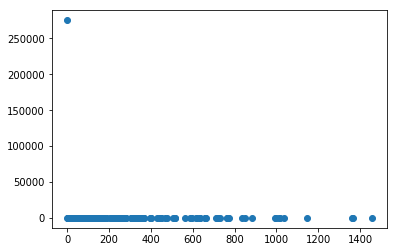

In [109]:
# there are many -1 days exsiting which means dac very close to tfa.

plt.scatter(dt_span.value_counts().index.values, dt_span.value_counts().values)



In [110]:
dt_span.unique()

array([ 465,  731,  475,  764,  279,   -1,  311,  100,    6,  261,  355,
        215, 1368,    5,  162, 1455,  664,  307, 1360,  353,  273,  217,
         75,  348,  850,  994,    1,  997,  153, 1035,  615,  721,  515,
       1010, 1147,   19,  767,   90,  447,   12,    3,  336,  398,  709,
       1017,  327,    0,    2,  310,  240,   77,  717,  303,  258,  302,
         61,  657,  837,  166,  506,  238,  400,  282,  881,  635,   36,
        450,   15,  564,  633,  357,  136,  313,   94,  773,  168,   30,
        203,  762,  586,   39,   56,  124,  123,   46,  175,  658,  594,
        513,   17,   43,   85,  430,  128,  321,  621,  233,   79,    4,
        137,   64,   28,  394,   91,  152,   10,  437,  102,  366,  368,
        446,  363,  132,  209,  361,  236,  117,  248,   16,  142,  115,
        107,  228,  330,   73,  149,  145,  358,  188,  257,    8,  103,
         45,  178,    9,  131,  245,  242,   34,   20,  105,  110,  143], dtype=int64)

In [111]:
# create categorical feature: span = -1; -1 < span < 30; 31 < span < 365; span > 365

def get_span(dt):
    # dt is an integer
    if dt == -1:
        return 'OneDay'
    elif (dt < 30) & (dt > -1):
        return 'OneMonth'
    elif (dt >= 30) & (dt <= 365):
        return 'OneYear'
    else:
        return 'other'

In [112]:
df['dt_span'] = np.array([get_span(x) for x in dt_span])
df_dt_span = pd.get_dummies(df.dt_span, prefix = 'dt_span')
df = pd.concat((df, df_dt_span), axis = 1)
df.drop(['dt_span'], axis = 1, inplace = True)
df.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,dac_wd_6,dac_wd_7,dac_season_Fall,dac_season_Spring,dac_season_Summer,dac_season_Winter,dt_span_OneDay,dt_span_OneMonth,dt_span_OneYear,dt_span_other
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,...,0,0,0,0,1,0,0,0,0,1
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,...,0,0,0,1,0,0,0,0,0,1
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,0,0,1,0,0,0,0,0,0,1
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,0,0,0,0,0,1,0,0,0,1
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,...,0,0,1,0,0,0,0,0,1,0


In [113]:
# drop the time feature after feature engineering
df.drop(['date_account_created','timestamp_first_active'], axis = 1, inplace = True)

In [114]:
df.columns

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'tfa_year',
       'tfa_month', 'tfa_day', 'tfa_wd_1', 'tfa_wd_2', 'tfa_wd_3', 'tfa_wd_4',
       'tfa_wd_5', 'tfa_wd_6', 'tfa_wd_7', 'tfa_season_Fall',
       'tfa_season_Spring', 'tfa_season_Summer', 'tfa_season_Winter',
       'dac_year', 'dac_month', 'dac_day', 'dac_wd_1', 'dac_wd_2', 'dac_wd_3',
       'dac_wd_4', 'dac_wd_5', 'dac_wd_6', 'dac_wd_7', 'dac_season_Fall',
       'dac_season_Spring', 'dac_season_Summer', 'dac_season_Winter',
       'dt_span_OneDay', 'dt_span_OneMonth', 'dt_span_OneYear',
       'dt_span_other'],
      dtype='object')

# Age

In [115]:
# Age has many abnormal values that we need to deal with. 
age = df.age

In [116]:
df.fillna?

In [117]:
age.fillna(-1, inplace = True)

In [118]:
div = 15

def get_age(age):
    # age is a float number
    if age < 0:
        return 'NA'
    elif (age < div):
        return div
    elif (age <= div * 2):
        return div*2
    elif (age <= div * 3):
        return div * 3
    elif (age <= div * 4):
        return div * 4
    elif (age <= div * 5):
        return div * 5
    elif (age <= 110):
        return div * 6
    else:
        return 'Unphysical'
        

In [119]:
# create age categorical features:

df['age'] = np.array([get_age(x) for x in age])
df_age = pd.get_dummies(df.age, prefix = 'age')
df_age.head()

,age_15,age_30,age_45,age_60,age_75,age_90,age_NA,age_Unphysical
0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [120]:
df = pd.concat((df, df_age), axis = 1)
df.drop(['age'], axis = 1, inplace = True)
df.head()

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,dt_span_OneYear,dt_span_other,age_15,age_30,age_45,age_60,age_75,age_90,age_NA,age_Unphysical
0,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,...,0,1,0,0,0,0,0,0,1,0
1,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,...,0,1,0,0,1,0,0,0,0,0
2,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,...,0,1,0,0,0,1,0,0,0,0
3,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,...,0,1,0,0,1,0,0,0,0,0
4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,...,1,0,0,0,1,0,0,0,0,0


In [121]:
df.shape

(275547, 50)

# One Hot Encoding other features

In [122]:
# pay attention to the 'first_affiliate_tracked' when OHE since this one has missing values. 

feat_toOHE = ['gender', 
             'signup_method', 
             'signup_flow', 
             'language', 
             'affiliate_channel', 
             'affiliate_provider', 
             'first_affiliate_tracked', 
             'signup_app', 
             'first_device_type', 
             'first_browser']

In [123]:
for f in feat_toOHE:
    #dummy_na：增加一行表示nans，默认为false
    df_ohe = pd.get_dummies(df[f], prefix=f, dummy_na=True)
    df.drop([f], axis = 1, inplace = True)
    df = pd.concat((df, df_ohe), axis = 1)

# Feature engineering completed at this stage

In [124]:
df.shape

(275547, 203)

In [125]:
df.head()

,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,...,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,first_browser_nan
0,2009,3,19,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009,5,23,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2009,6,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,10,31,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,12,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df.columns

Index(['tfa_year', 'tfa_month', 'tfa_day', 'tfa_wd_1', 'tfa_wd_2', 'tfa_wd_3',
       'tfa_wd_4', 'tfa_wd_5', 'tfa_wd_6', 'tfa_wd_7',
       ...
       'first_browser_SiteKiosk', 'first_browser_SlimBrowser',
       'first_browser_Sogou Explorer', 'first_browser_Stainless',
       'first_browser_TenFourFox', 'first_browser_TheWorld Browser',
       'first_browser_UC Browser', 'first_browser_Yandex.Browser',
       'first_browser_wOSBrowser', 'first_browser_nan'],
      dtype='object', length=203)

In [127]:
df.columns.unique()

# make sure there is no duplicate features.

Index(['tfa_year', 'tfa_month', 'tfa_day', 'tfa_wd_1', 'tfa_wd_2', 'tfa_wd_3',
       'tfa_wd_4', 'tfa_wd_5', 'tfa_wd_6', 'tfa_wd_7',
       ...
       'first_browser_SiteKiosk', 'first_browser_SlimBrowser',
       'first_browser_Sogou Explorer', 'first_browser_Stainless',
       'first_browser_TenFourFox', 'first_browser_TheWorld Browser',
       'first_browser_UC Browser', 'first_browser_Yandex.Browser',
       'first_browser_wOSBrowser', 'first_browser_nan'],
      dtype='object', length=203)

# split the train and test dataset now

In [128]:
# train_row is the numbers of row we recorded earlier. 

Xtrain = df.iloc[:train_row, :]
Xtest = df.iloc[train_row:, :]

# convert the labels to numerical values
le = LabelEncoder()
le.fit(labels)
ytrain = le.transform(labels)

print (ytrain)

[ 7  7 10 ...,  7  7  7]


In [129]:
print (train.shape[0] == Xtrain.shape[0])
print (test.shape[0] == Xtest.shape[0])

True
True


In [130]:
#处理后写入文件
Xtrain.to_csv("Airbnb_xtrain_v1.csv")
Xtest.to_csv("Airbnb_xtest_v1.csv")
labels.tofile("Airbnb_ytrain_v1.csv", sep='\n', format='%s')